In [2]:
%matplotlib inline
from sklearn import mixture
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy.interpolate import *


In [16]:
# Carga de datos 
data = np.loadtxt('LED_2.6V_S13360_56V_30C.txt').T
samples =500
time_0 =0
time=np.linspace(0,samples*8,samples)
pulses = -1000*data[time_0:time_0+samples,:10000]
#pulses = -data
# Constants
t = 8e-9
gain = 92  
res = 51
kte = t/(gain*res)
#print(len(data))

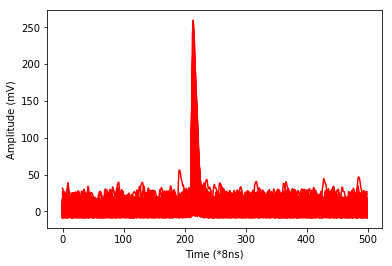

In [15]:
# Grafica de pulsos con ruido
plt.figure()
plt.plot(pulses,'r',alpha=1)
plt.xlabel('Time (*8ns)')
plt.ylabel('Amplitude (mV)')
#plt.gcf().set_size_inches(17,12)
plt.show()

In [17]:
# Corrección de linea base
N = len(pulses.T)	# Numero de pulsos
mean = np.mean(pulses[1,:])
pulses = pulses - mean
mi = np.zeros(N)
pul = 0
outliers = []
for i in range (N):
	sum = 0
	mi[i] = np.amin(pulses[:,i])
	if mi[i] > -9:
		pul = pul + 1
	else:
		outliers.append(i)       


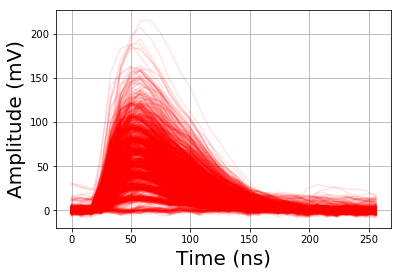

In [18]:
# señal filtrada 
pulses=np.delete(pulses,(outliers),axis=1)
time=np.linspace(0,32*8,32)
plt.figure()
plt.plot(time,pulses[208:240,:2000],'r',alpha=0.1)
plt.xlabel('Time (ns)', fontsize=20)
plt.ylabel('Amplitude (mV)', fontsize=20)
plt.grid(True)
#plt.savefig('2kPulses_Hamamatus.png')
plt.show()


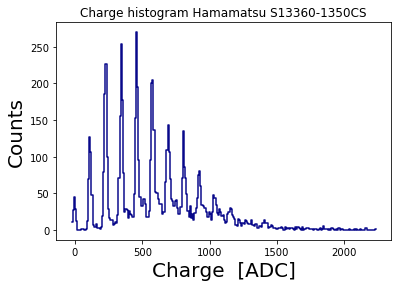

In [19]:
# Calculo del histograma de carga
N = len(pulses.T)	# Numero de pulsos
charge = np.zeros((N,1))
peak = np.zeros((N,1))
wind=25
start=209
pulsesf=pulses[start:start+wind,:]
for i in range (N):
	charge[i] = np.sum(pulsesf[:,i])
	peak[i] = np.max(pulsesf[:,i])
# Histograma de carga 
bins, edges = np.histogram(charge,260)
left, right = edges[:-1], edges[1:]
X = np.array([left, right]).T.flatten()
Y = np.array([bins, bins]).T.flatten()
plt.plot(X, Y,'#08088A')
plt.title('Charge histogram Hamamatsu S13360-1350CS')
plt.xlabel("Charge  [ADC]", fontsize=20)
plt.ylabel("Counts", fontsize=20)
#plt.gcf().set_size_inches(11,7)
#plt.savefig('Charge histogram Hamamatsu S13360-1350CS.png')
plt.show()


In [20]:
# Obtención del equivalente de carga de 1 p.e. y de la ganancia a partir del histograma de carga

pG1 = []
pG2 = []
pG3 = []
pG4 = []
pG5 = []
pG6 = []
pG7 = []

for n in charge:
	if n > -40 and n < 60:
		pG1.append(n)
	if n >= 60 and n < 160:
		pG2.append(n)
	if n >= 160 and n < 300:
		pG3.append(n)
	if n >= 300 and n < 430:
		pG4.append(n)
	if n >= 430 and n < 550:
		pG5.append(n)
	if n >= 550 and n < 660:
		pG6.append(n)
	if n >= 660 and n < 780:
		pG7.append(n)

(m1, sd1) = norm.fit(pG1)
(m2, sd2) = norm.fit(pG2)
(m3, sd3) = norm.fit(pG3)
(m4, sd4) = norm.fit(pG4)
(m5, sd5) = norm.fit(pG5)
(m6, sd6) = norm.fit(pG6)
(m7, sd7) = norm.fit(pG7)

pe = [m2-m1, m3-m2, m4-m3, m5-m4,m6-m5,m7-m6]
Qpe=np.mean(pe)*kte
G=Qpe*(1e-3)/(1.602176e-19)
#print (pe)
print 'Charge 1pe: ' + str(Qpe) + ' C'
print 'Gain: ' + str(G)

Charge 1pe: 2.01961559301e-10 C
Gain: 1260545.40388


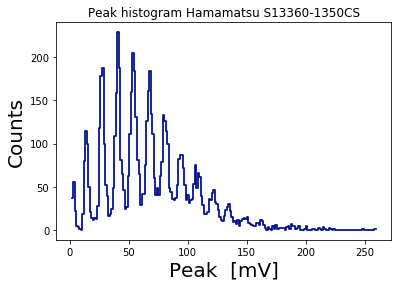

In [27]:
# Peak histogram
bins, edges = np.histogram(peak,200)
left, right = edges[:-1], edges[1:]
X = np.array([left, right]).T.flatten()
Y = np.array([bins, bins]).T.flatten()
plt.plot(X, Y)
plt.plot(X, Y,'#08088A')
plt.title('Peak histogram Hamamatsu S13360-1350CS')
plt.xlabel("Peak  [mV]", fontsize=20)
plt.ylabel("Counts", fontsize=20)
#plt.gcf().set_size_inches(11,7)
plt.show()


In [29]:
# Obtención del equivalente de voltaje de 1 p.e. a partir del histograma de pico

peak2 = []
peak3 = []
peak4 = []
peak5 = []
peak6 = []
peak7 = []

for n in peak:
	if n >= 8 and n < 20:
		peak2.append(n)
	if n >= 20 and n < 35:
		peak3.append(n)
	if n >= 35 and n < 48:
		peak4.append(n)
	if n >= 48 and n < 62:
		peak5.append(n)
	if n >= 62 and n < 75:
		peak6.append(n)
	if n >= 75 and n < 88:
		peak7.append(n)

(mu2, std2) = norm.fit(peak2)
(mu3, std3) = norm.fit(peak3)
(mu4, std4) = norm.fit(peak4)
(mu5, std5) = norm.fit(peak5)
(mu6, std6) = norm.fit(peak6)
(mu7, std7) = norm.fit(peak7)

pe = [ mu3-mu2, mu4-mu3, mu5-mu4,mu6-mu5,mu7-mu6]
(mupe, stdpe) = norm.fit(pe)
pe1=np.mean(pe)
#print(pe)
print 'A photo-electron is equivalet to: ' + str(pe1) + ' mV'


A photo-electron is equivalet to: 13.3046652046 mV
